In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [23]:
tech_list = ['WOW', 'CBA']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [24]:
company_list = [WOW, CBA]
company_name = ['WOW', 'CBA']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-05-03,0.090,0.090,0.090,0.090,0.0,0.090,CBA
2021-05-04,0.090,0.090,0.090,0.090,0.0,0.090,CBA
2021-05-05,0.095,0.095,0.095,0.095,16000.0,0.095,CBA
2021-05-06,0.095,0.095,0.095,0.095,3000.0,0.095,CBA
2021-05-07,0.085,0.085,0.085,0.085,4000.0,0.085,CBA
2021-05-10,0.085,0.085,0.085,0.085,500.0,0.085,CBA
2021-05-11,0.085,0.085,0.085,0.085,0.0,0.085,CBA
2021-05-12,0.085,0.085,0.085,0.085,0.0,0.085,CBA
2021-05-13,0.085,0.085,0.085,0.085,0.0,0.085,CBA


In [25]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(tieseries):
    rollmean = tieseries.rolling(window=12).mean()
    rollstd = tieseries.rolling(window=12).std()

    plt.plot(tieseries, color="blue", label="Original")
    plt.plot(rollmean, color="red", label="Rolling Mean")
    plt.plot(rollstd, color="black", label="Rolling Std")    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(tieseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput,'%f' % (1/10**8))

In [26]:
WOW_DF = WOW['Open']
CBA_DF = CBA['Open']

Rolling Mean & Standard Deviation for WOW


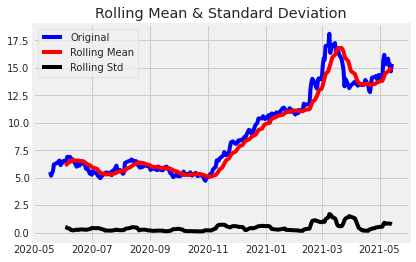

Results of Dickey-Fuller Test:
Test Statistic                  -0.043444
p-value                          0.954788
#Lags Used                       1.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64 0.000000


---------------------------------------------------------------


Rolling Mean & Standard Deviation for CBA


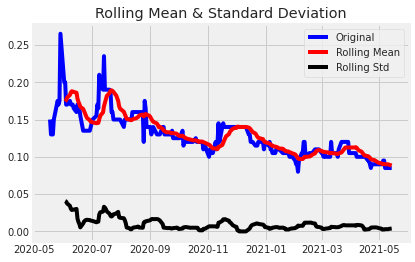

Results of Dickey-Fuller Test:
Test Statistic                  -2.149087
p-value                          0.225240
#Lags Used                       3.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64 0.000000


In [27]:
print('Rolling Mean & Standard Deviation for WOW')
test_stationarity(WOW_DF)
print('\n')
print('---------------------------------------------------------------')
print('\n')
print('Rolling Mean & Standard Deviation for CBA')
test_stationarity(CBA_DF)

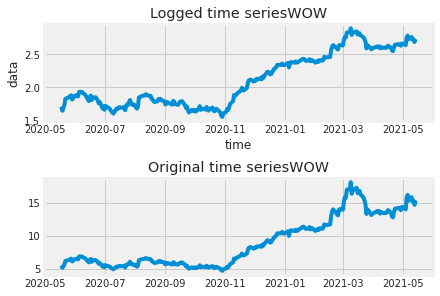

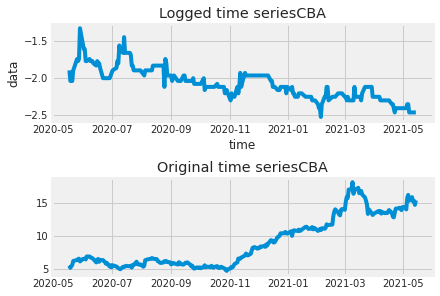

In [29]:
import matplotlib.gridspec as gridspec
for i, company in enumerate(company_list, 1):
  company_log = np.log(company['Open'])
  fig = plt.figure(constrained_layout = True)
  gs_1 = gridspec.GridSpec(2, 3, figure = fig)
  ax_1 = fig.add_subplot(gs_1[0, :])
  ax_1.plot(company_log)
  ax_1.set_xlabel('time')
  ax_1.set_ylabel('data')
  plt.title('Logged time series' f"{tech_list[i - 1]}")

  ax_2 = fig.add_subplot(gs_1[1, :])
  ax_2.plot(WOW_DF)
  ax_1.set_xlabel('time')
  ax_1.set_ylabel('data')
  plt.title('Original time series' f"{tech_list[i - 1]}")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)


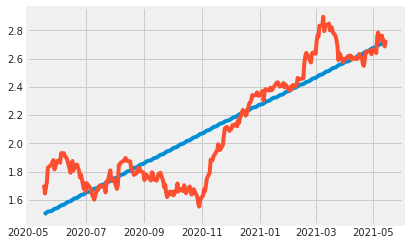

In [30]:
from sklearn import datasets, linear_model
WOW_log = np.log(WOW_DF)
WOW_wi = WOW_log.reset_index()
df_values = WOW_wi.values
train_y = df_values[:,1]
train_y = train_y[:, np.newaxis]
train_x = WOW_wi.index
train_x = train_x[:, np.newaxis]
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
pred = regr.predict(train_x)
plt.plot(WOW_wi.Date, pred)
plt.plot(WOW_log)

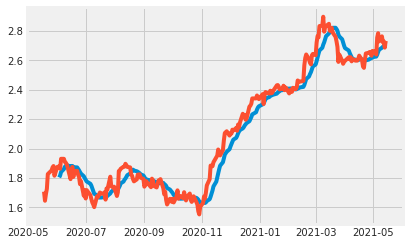

In [31]:
mov_average = WOW_log.rolling(12).mean()
plt.plot(mov_average)
plt.plot(WOW_log)

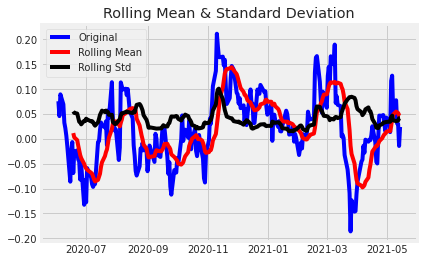

Results of Dickey-Fuller Test:
Test Statistic                  -3.947115
p-value                          0.001714
#Lags Used                       0.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64 0.000000


In [32]:
WOW_log_mov_av_diff = WOW_log - mov_average
#ts_log_mov_av_diff.head(12)
WOW_log_mov_av_diff.dropna(inplace=True)

test_stationarity(WOW_log_mov_av_diff)

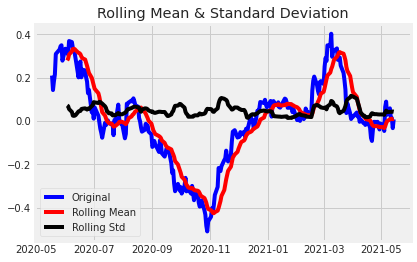

Results of Dickey-Fuller Test:
Test Statistic                  -1.488789
p-value                          0.539050
#Lags Used                       1.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64 0.000000


In [33]:
WOW_log_mov_reg_diff = WOW_log - pred[:,0]
#ts_log_mov_av_diff.head(12)
WOW_log_mov_reg_diff.dropna(inplace=True)

test_stationarity(WOW_log_mov_reg_diff)

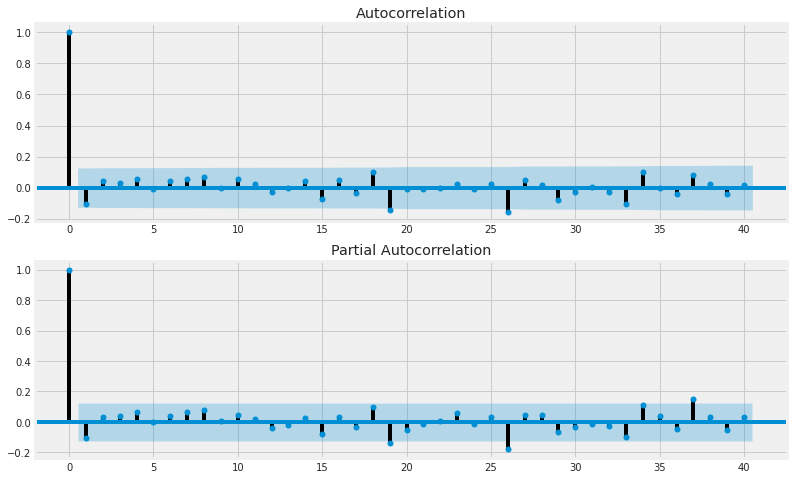

In [34]:
from statsmodels.graphics import tsaplots as tsa
WOW_log_diff = WOW_log - WOW_log.shift(1)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsa.plot_acf(WOW_log_diff.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = tsa.plot_pacf(WOW_log_diff.iloc[13:], lags=40, ax=ax2)

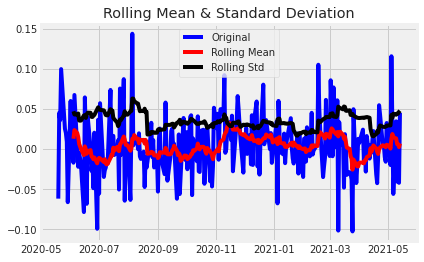

Results of Dickey-Fuller Test:
Test Statistic                -1.744348e+01
p-value                        4.695277e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64 0.000000


In [35]:
WOW_log_diff.dropna(inplace=True)
test_stationarity(WOW_log_diff)

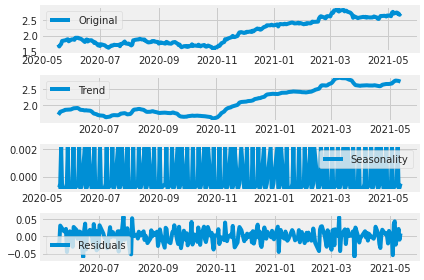

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(WOW_log, freq=4, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(WOW_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

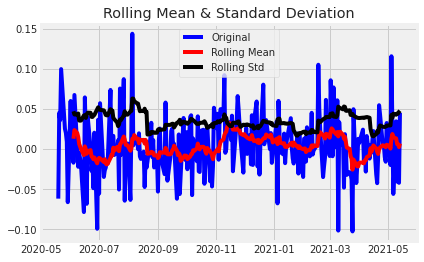

Results of Dickey-Fuller Test:
Test Statistic                -1.744348e+01
p-value                        4.695277e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64 0.000000


In [37]:
WOW_decompose = WOW_log_diff
WOW_decompose.dropna(inplace=True)
test_stationarity(WOW_decompose)

# ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA RMSE: 0.037235


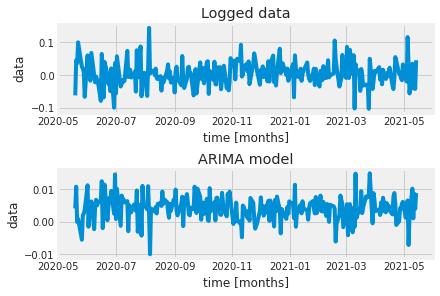

In [39]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Raw time serie
fig = plt.figure(constrained_layout=True) 
gs = gridspec.GridSpec(2, 1, figure=fig)
ax = fig.add_subplot(gs[0, :])
ax.plot(WOW_decompose)
ax.set_xlabel('time [months]')
ax.set_ylabel('data')
ax.set_title('Logged data')

model = ARIMA(WOW_decompose, order=(1, 0, 0))
res = model.fit(disp=-2)

ax2 = fig.add_subplot(gs[1, :])
ax2.plot(res.fittedvalues)
ax2.set_xlabel('time [months]')
ax2.set_ylabel('data')
ax2.set_title('ARIMA model')

print('ARIMA RMSE: %.6f'% np.sqrt(sum((res.fittedvalues-WOW_decompose)**2)/len(WOW_DF)))

# SARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX RMSE: 0.045186


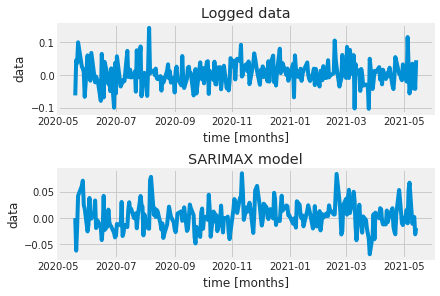

In [40]:
mod = SARIMAX(WOW_decompose, trend='n', order=(1,1,0), seasonal_order=(3,0,3,4))
resSARIMAX = mod.fit()
pred = resSARIMAX.predict()

# Raw time serie
fig = plt.figure(constrained_layout=True) 
gs = gridspec.GridSpec(2, 1, figure=fig)
ax = fig.add_subplot(gs[0, :])
ax.plot(WOW_decompose)
ax.set_xlabel('time [months]')
ax.set_ylabel('data')
ax.set_title('Logged data')

ax2 = fig.add_subplot(gs[1, :])
ax2.plot(pred)
ax2.set_xlabel('time [months]')
ax2.set_ylabel('data')
ax2.set_title('SARIMAX model')
print('SARIMAX RMSE: %.6f'% np.sqrt(sum((pred-WOW_decompose)**2)/len(WOW_DF)))

ARIMA RMSE: 2.0222
SARIMA RMSE: 0.5709


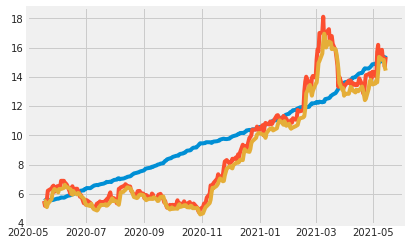

In [44]:
predictions_SARIMA_diff = pd.Series(pred, copy=True)
predictions_SARIMA_diff_cumsum = predictions_SARIMA_diff.cumsum()
predictions_SARIMA_log = pd.Series(WOW_log.iloc[0], index=WOW_log.index)
predictions_SARIMA_log = predictions_SARIMA_log.add(predictions_SARIMA_diff_cumsum,fill_value=0)
predictions_SARIMA = np.exp(predictions_SARIMA_log)

predictions_ARIMA_diff = pd.Series(res.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(WOW_log.iloc[0], index=WOW_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(predictions_ARIMA)
print('ARIMA RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-WOW_DF)**2)/len(WOW_DF)))

plt.plot(WOW_DF)
plt.plot(predictions_SARIMA)
print('SARIMA RMSE: %.4f'% np.sqrt(sum((predictions_SARIMA-WOW_DF)**2)/len(WOW_DF)))

# Commonwealth Bank

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)


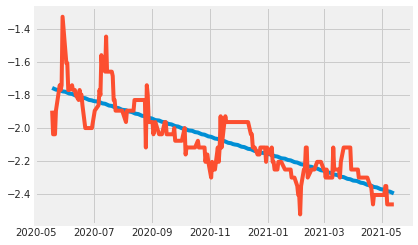

In [45]:
from sklearn import datasets, linear_model
CBA_log = np.log(CBA_DF)
CBA_wi = CBA_log.reset_index()
df_values = CBA_wi.values
train_y = df_values[:,1]
train_y = train_y[:, np.newaxis]
train_x = CBA_wi.index
train_x = train_x[:, np.newaxis]
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
pred = regr.predict(train_x)
plt.plot(CBA_wi.Date, pred)
plt.plot(CBA_log)

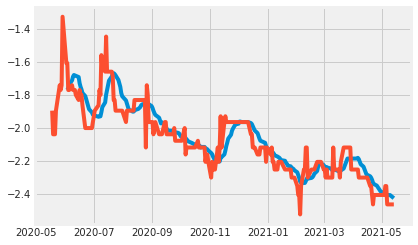

In [46]:
mov_average = CBA_log.rolling(12).mean()
plt.plot(mov_average)
plt.plot(CBA_log)

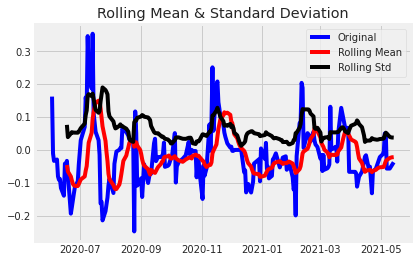

Results of Dickey-Fuller Test:
Test Statistic                -6.080563e+00
p-value                        1.094785e-07
#Lags Used                     7.000000e+00
Number of Observations Used    2.280000e+02
Critical Value (1%)           -3.459361e+00
Critical Value (5%)           -2.874302e+00
Critical Value (10%)          -2.573571e+00
dtype: float64 0.000000


In [47]:
CBA_log_mov_av_diff = CBA_log - mov_average
#ts_log_mov_av_diff.head(12)
CBA_log_mov_av_diff.dropna(inplace=True)

test_stationarity(CBA_log_mov_av_diff)

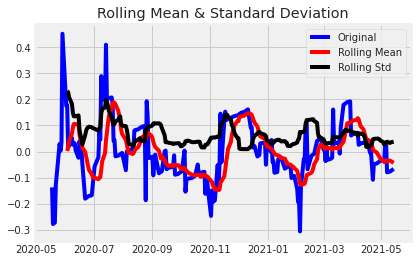

Results of Dickey-Fuller Test:
Test Statistic                  -5.045879
p-value                          0.000018
#Lags Used                       3.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64 0.000000


In [48]:
CBA_log_mov_reg_diff = CBA_log - pred[:,0]
#ts_log_mov_av_diff.head(12)
CBA_log_mov_reg_diff.dropna(inplace=True)

test_stationarity(CBA_log_mov_reg_diff)

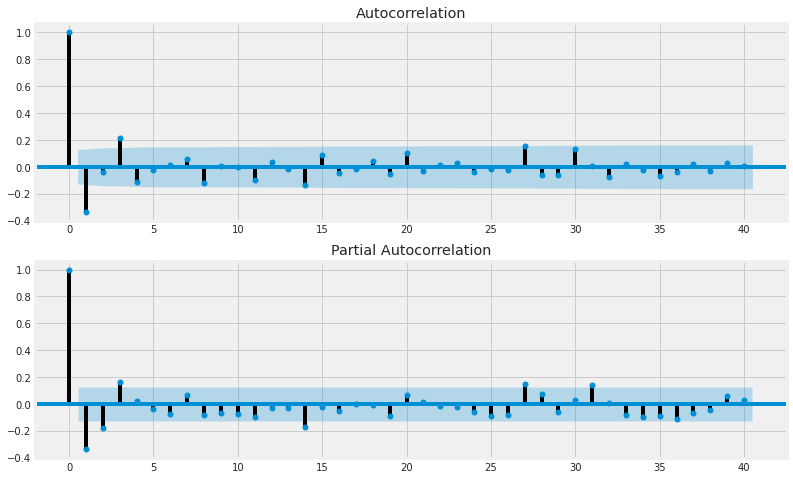

In [49]:
from statsmodels.graphics import tsaplots as tsa
CBA_log_diff = CBA_log - CBA_log.shift(1)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsa.plot_acf(CBA_log_diff.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = tsa.plot_pacf(CBA_log_diff.iloc[13:], lags=40, ax=ax2)

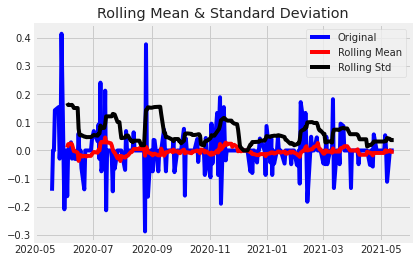

Results of Dickey-Fuller Test:
Test Statistic                -8.853027e+00
p-value                        1.554389e-14
#Lags Used                     2.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64 0.000000


In [50]:
CBA_log_diff.dropna(inplace=True)
test_stationarity(CBA_log_diff)

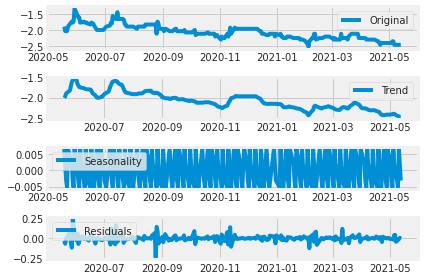

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(CBA_log, freq=4, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(CBA_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

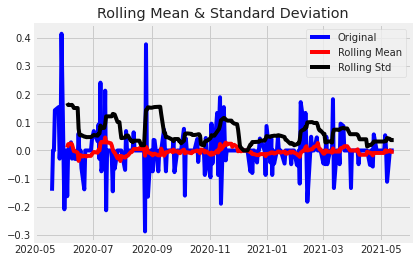

Results of Dickey-Fuller Test:
Test Statistic                -8.853027e+00
p-value                        1.554389e-14
#Lags Used                     2.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64 0.000000


In [52]:
CBA_decompose = CBA_log_diff
CBA_decompose.dropna(inplace=True)
test_stationarity(CBA_decompose)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA RMSE: 0.070353


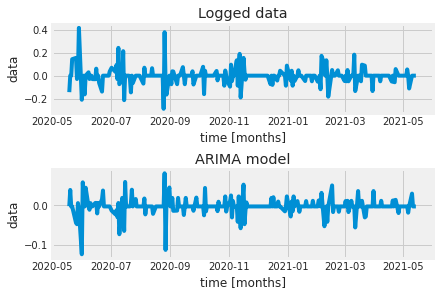

In [55]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Raw time serie
fig = plt.figure(constrained_layout=True) 
gs = gridspec.GridSpec(2, 1, figure=fig)
ax = fig.add_subplot(gs[0, :])
ax.plot(CBA_decompose)
ax.set_xlabel('time [months]')
ax.set_ylabel('data')
ax.set_title('Logged data')

model = ARIMA(CBA_decompose, order=(1, 0, 0))
res = model.fit(disp=-2)

ax2 = fig.add_subplot(gs[1, :])
ax2.plot(res.fittedvalues)
ax2.set_xlabel('time [months]')
ax2.set_ylabel('data')
ax2.set_title('ARIMA model')

print('ARIMA RMSE: %.6f'% np.sqrt(sum((res.fittedvalues-CBA_decompose)**2)/len(CBA_DF)))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


SARIMAX RMSE: 0.093383


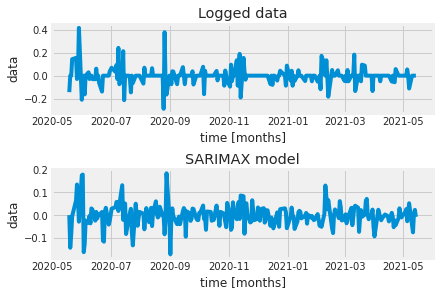

In [57]:
mod = SARIMAX(CBA_decompose, trend='n', order=(1,1,0), seasonal_order=(3,0,3,4))
resSARIMAX = mod.fit()
pred = resSARIMAX.predict()

# Raw time serie
fig = plt.figure(constrained_layout=True) 
gs = gridspec.GridSpec(2, 1, figure=fig)
ax = fig.add_subplot(gs[0, :])
ax.plot(CBA_decompose)
ax.set_xlabel('time [months]')
ax.set_ylabel('data')
ax.set_title('Logged data')

ax2 = fig.add_subplot(gs[1, :])
ax2.plot(pred)
ax2.set_xlabel('time [months]')
ax2.set_ylabel('data')
ax2.set_title('SARIMAX model')
print('SARIMAX RMSE: %.6f'% np.sqrt(sum((pred-CBA_decompose)**2)/len(CBA_DF)))

ARIMA RMSE: 0.0260
SARIMA RMSE: 0.0177


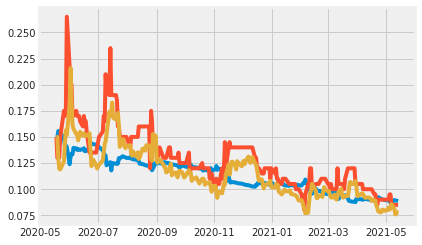

In [58]:
predictions_SARIMA_diff = pd.Series(pred, copy=True)
predictions_SARIMA_diff_cumsum = predictions_SARIMA_diff.cumsum()
predictions_SARIMA_log = pd.Series(CBA_log.iloc[0], index=CBA_log.index)
predictions_SARIMA_log = predictions_SARIMA_log.add(predictions_SARIMA_diff_cumsum,fill_value=0)
predictions_SARIMA = np.exp(predictions_SARIMA_log)

predictions_ARIMA_diff = pd.Series(res.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(CBA_log.iloc[0], index=CBA_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(predictions_ARIMA)
print('ARIMA RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-CBA_DF)**2)/len(CBA_DF)))

plt.plot(CBA_DF)
plt.plot(predictions_SARIMA)
print('SARIMA RMSE: %.4f'% np.sqrt(sum((predictions_SARIMA-CBA_DF)**2)/len(CBA_DF)))